# Imports

In [2]:
import yfinance        as yf
import seaborn         as sns
import numpy           as np
import pandas          as pd

from matplotlib              import pyplot as plt
from pandas_datareader       import data   as pdr
from IPython.core.display    import HTML

## Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [4]:
start = '2000-01-01'
end = '2019-12-31'

data = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [6]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


# Data Description

In [7]:
df2 = data.copy()

In [8]:
df2.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Times Series Visualization

In [9]:
df3 = df2.copy()

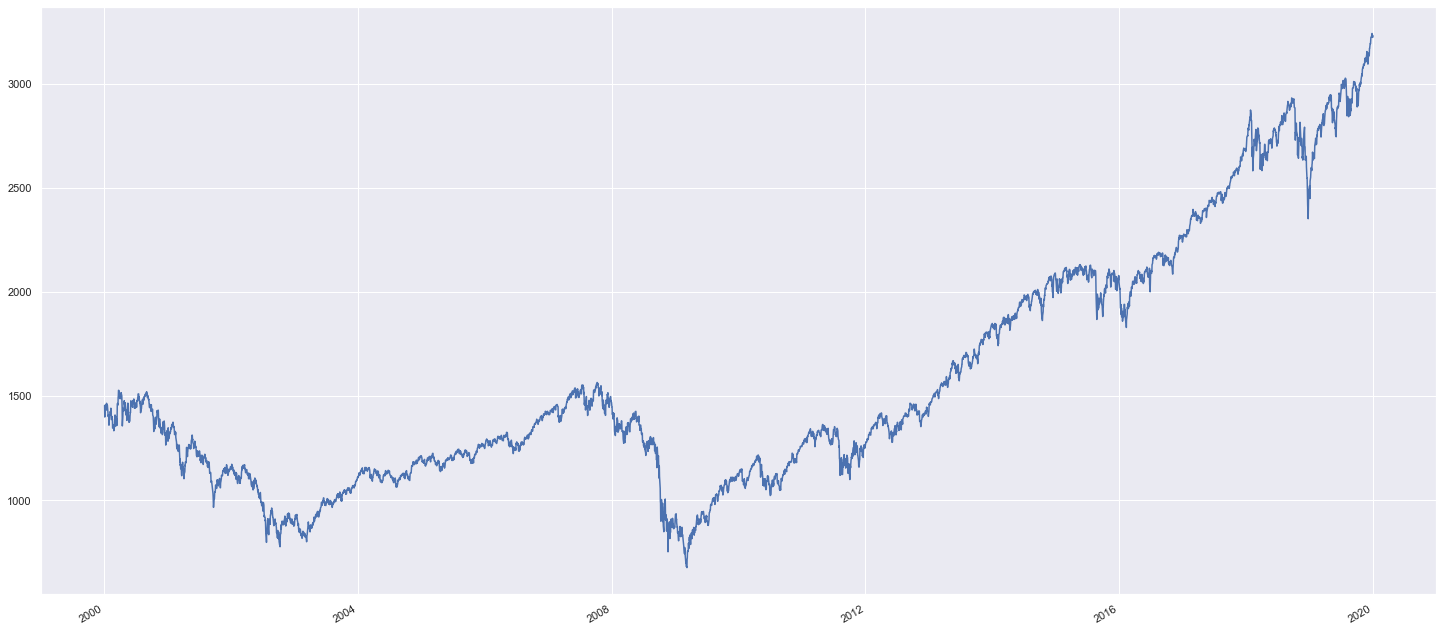

In [10]:
df3['Close'].plot()
#plt.title( 'Gráfico da Série S&P 500' );
plt.xlabel( '' );

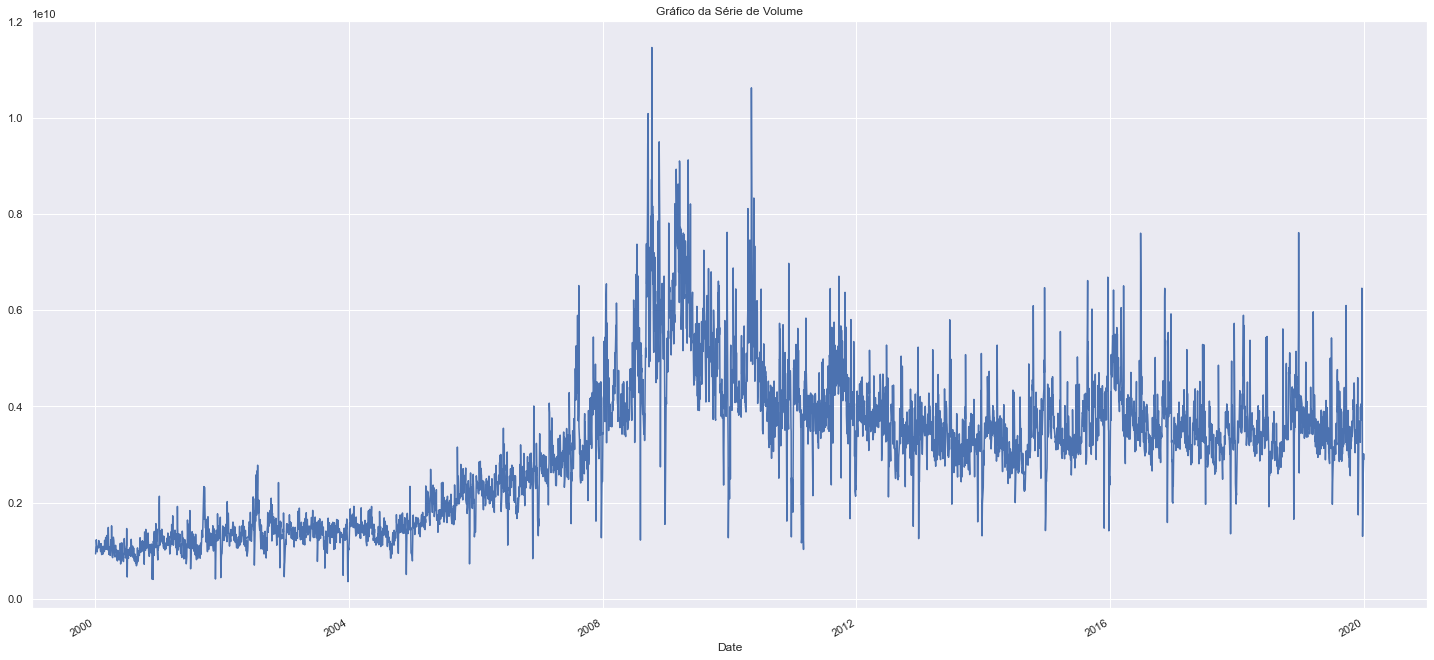

In [11]:
df3['Volume'].plot();
plt.title( 'Gráfico da Série de Volume' );

# Exploratory Data Analysis

In [12]:
df4 = df3.copy()

In [13]:
df4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,1583.705860,1565.203475,1574.823903,1575.009290,3.091681e+09,1575.009290
std,586.565207,584.963805,585.834835,585.938690,1.473928e+09,585.938690
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1159.934998,1142.179993,1151.739990,1151.629944,1.672600e+09,1151.629944
50%,1368.920044,1349.989990,1360.829956,1361.219971,3.218700e+09,1361.219971
75%,1993.084961,1975.660034,1985.319946,1986.479980,3.918595e+09,1986.479980
max,3247.929932,3234.370117,3247.229980,3240.020020,1.145623e+10,3240.020020


In [14]:
# lag de X periodos

periodos = 1

# lag positivo de X periodos
df4['Lag_P1'] = df4['Close'].shift( periodos )

In [15]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1
Date,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951


In [16]:
# Dummy para saber se o dia atual é Alta(1) ou Baixa(0)

df4['High_Low'] = np.where( df4['Close'] > df4['Lag_P1'], 1, 0 )

In [17]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low
Date,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1


In [18]:
df4['High_Low'].mean()

0.5352812562114888

In [19]:
# Calculando o Retorno

df4['Retorno'] = df4['Close'].pct_change( periodos )

In [20]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


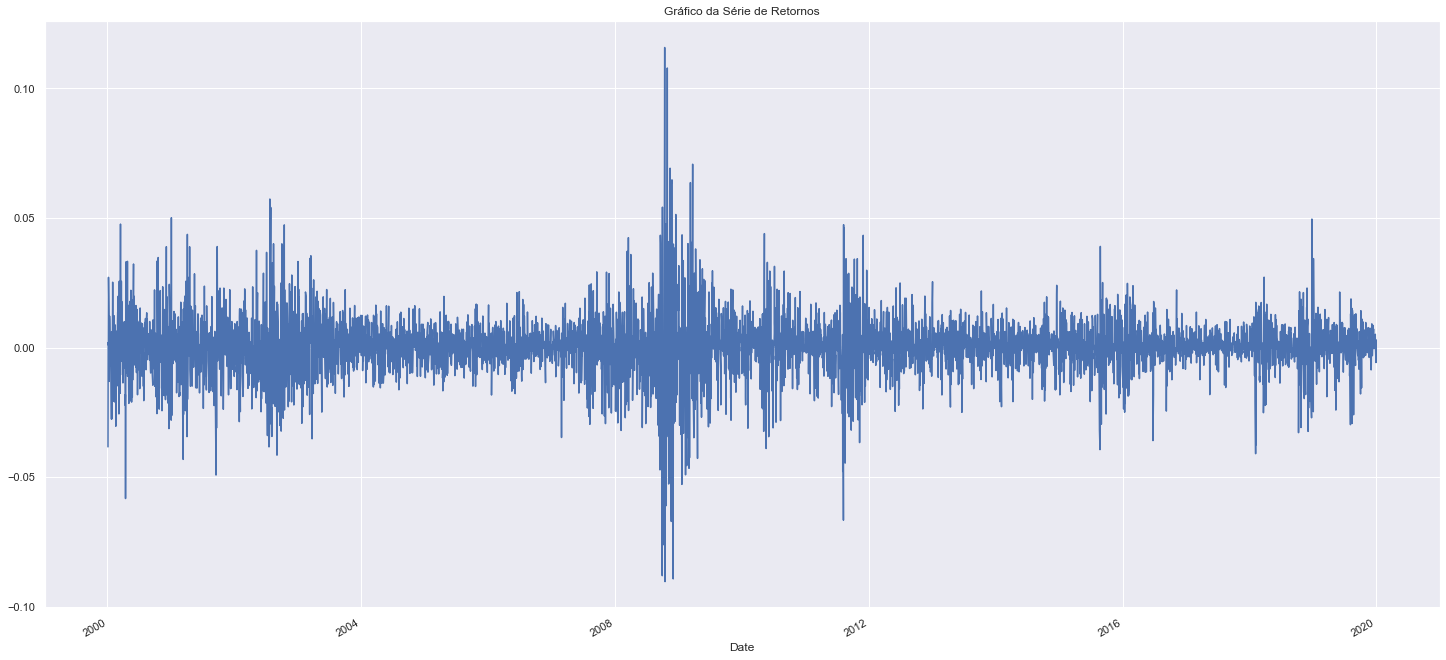

In [21]:
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


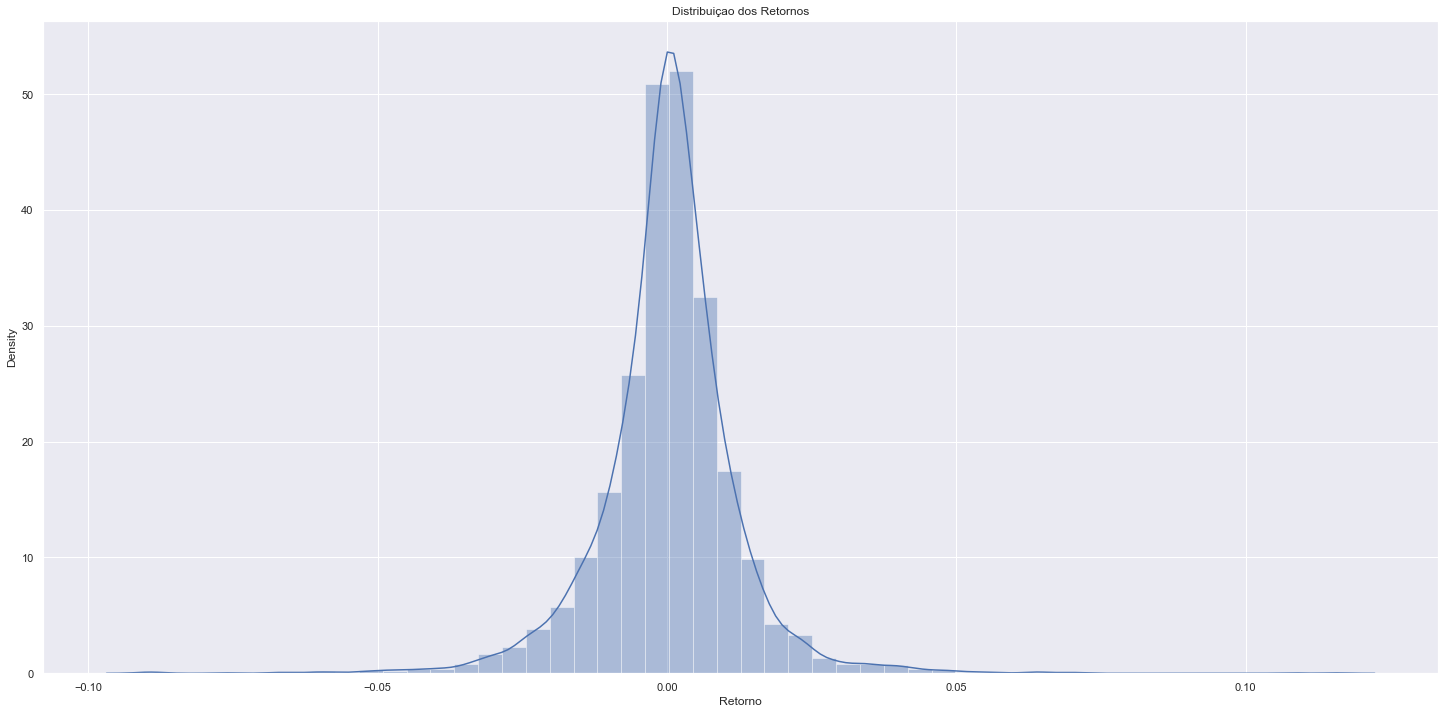

In [22]:
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


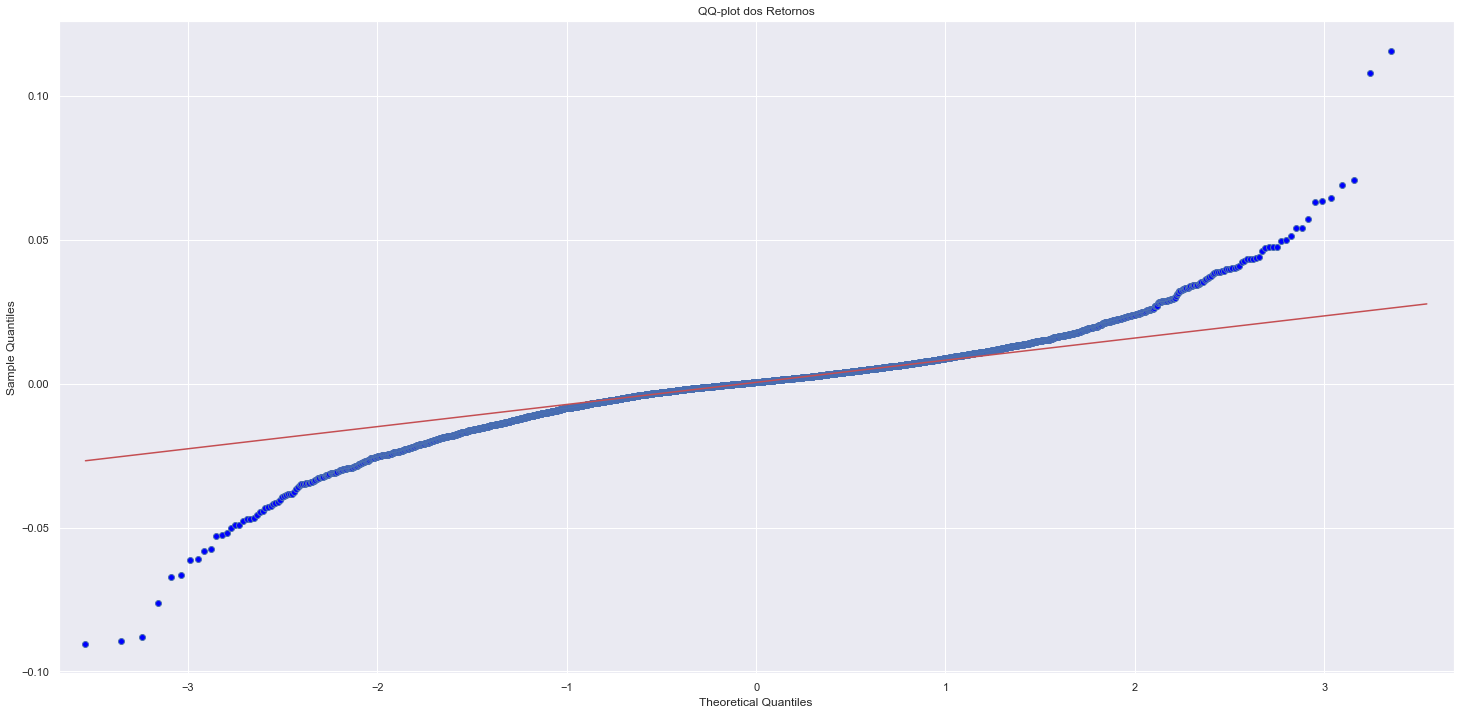

In [23]:
sm.qqplot( df4['Retorno'], line='q' )
plt.title( 'QQ-plot dos Retornos' );

Consolidando os gráficos da série histórica, série de retornos, distribuição dos retornos e qq-plot em uma mesma imagem.

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


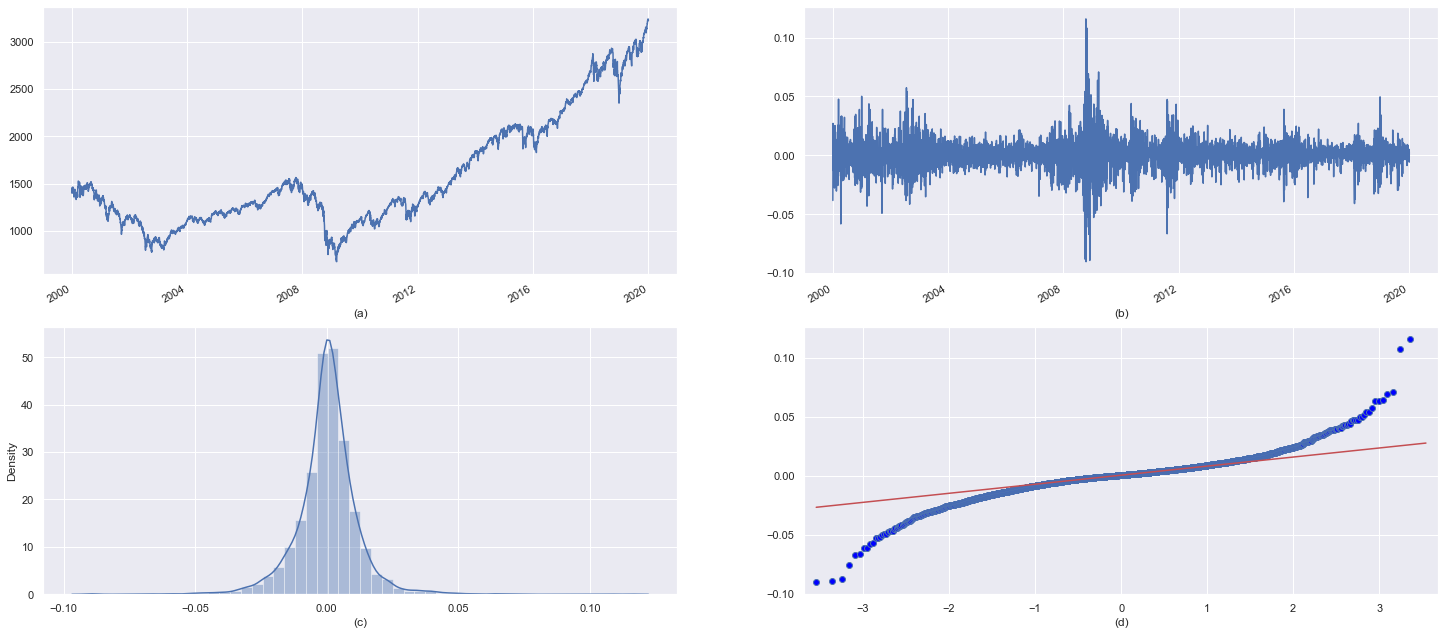

In [24]:
plt.subplot( 2, 2, 1 )
df3['Close'].plot()
plt.xlabel( '(a)' );

plt.subplot( 2, 2, 2 )
df4['Retorno'].plot()
plt.xlabel( '(b)' );

plt.subplot( 2, 2, 3 )
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.xlabel( '(c)' );

#plt.subplot( 2, 2, 4 )
sm.qqplot( df4['Retorno'], ax=plt.subplot( 2, 2, 4 ), line='q' ) 
plt.xlabel( '(d)' )
plt.ylabel( '' );